# Congressional Demographics

### Links

#### Chamber: House

[House Demographics 116th Congress](https://pressgallery.house.gov/member-data/demographics)

#### Chamber: Senate

[Senate Demographics 116th Congress](https://www.senate.gov/senators/EthnicDiversityintheSenate.htm)

In [96]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8,10]
plt.style = "fivethirtyeight"
import json
import re
import numpy as np
import seaborn as sns
# from foobar import api_key


### Propublica API 
Starting with the Propublica Database which will be used heavily

#### Lists of Members

To get a list of members of a particular chamber in a particular Congress, use the following URI 
structure. The results include all members who have served in that congress and chamber, including 
members who are no longer in office. To filter the list to only active members (or to see members 
who have left), use the in_office boolean attribute.

In [2]:
# congress = "116"
# chamber = "house"
# url = "https://api.propublica.org/congress/v1/{}/{}/members.json".format(congress, chamber)
# headers = {"X-API-Key": api_key}

# resp = requests.get(url, headers=headers)
# if resp.status_code != 200:
#     raise ValueError("Error getting data from ProPublica: Response Code {}".format(resp.status_code))

In [3]:
# house_members_pp_api = json.loads(resp.text)

In [4]:
# with open('house_members_pp_api.json', 'w') as outfile: 
#     json.dump(house_members_pp_api, outfile)

In [5]:
with open('house_members_pp_api.json') as json_file:
    house_members_pp_api = json.load(json_file)

In [6]:
house_members_pp_api["results"]

[{'congress': '116',
  'chamber': 'House',
  'num_results': 441,
  'offset': 0,
  'members': [{'id': 'A000374',
    'title': 'Representative',
    'short_title': 'Rep.',
    'api_uri': 'https://api.propublica.org/congress/v1/members/A000374.json',
    'first_name': 'Ralph',
    'middle_name': None,
    'last_name': 'Abraham',
    'suffix': None,
    'date_of_birth': '1954-09-16',
    'gender': 'M',
    'party': 'R',
    'leadership_role': None,
    'twitter_account': 'RepAbraham',
    'facebook_account': 'CongressmanRalphAbraham',
    'youtube_account': None,
    'govtrack_id': '412630',
    'cspan_id': '76236',
    'votesmart_id': '155414',
    'icpsr_id': '21522',
    'crp_id': 'N00036633',
    'google_entity_id': '/m/012dwd7_',
    'fec_candidate_id': 'H4LA05221',
    'url': 'https://abraham.house.gov',
    'rss_url': 'https://abraham.house.gov/rss.xml',
    'contact_form': None,
    'in_office': True,
    'dw_nominate': 0.514,
    'ideal_point': None,
    'seniority': '6',
    'nex

In [7]:
members = house_members_pp_api["results"][0]["members"]
house_demographics = pd.DataFrame(members)

In [8]:
mem_col = ["id", "" "first_name", "middle_name", "last_name", "suffix", "party", "state", "district",
           "seniority", "dw_nominate", "gender"]

In [9]:
house_demographics = house_demographics[mem_col]

In [10]:
house_demographics.rename(columns={"id": "member_id"}, inplace=True)

In [11]:
house_demographics

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender
0,A000374,Ralph,None,Abraham,None,R,LA,5,6,0.514,M
1,A000370,Alma,None,Adams,None,D,NC,12,8,-0.469,F
2,A000055,Robert,B.,Aderholt,None,R,AL,4,24,0.364,M
3,A000371,Pete,None,Aguilar,None,D,CA,31,6,-0.287,M
4,A000372,Rick,None,Allen,None,R,GA,12,6,0.639,M
5,A000376,Colin,None,Allred,None,D,TX,32,2,NaN,M
6,A000367,Justin,None,Amash,None,R,MI,3,10,0.640,M
7,A000369,Mark,None,Amodei,None,R,NV,2,10,0.382,M
8,A000377,Kelly,None,Armstrong,None,R,ND,At-Large,2,NaN,M
9,A000375,Jodey,None,Arrington,None,R,TX,19,4,0.522,M


#### 116th House Press Box

In [12]:
def name_to_mem_id(pp_df, demographic_df):
# Takes the name and match with the pp_id number
    for idx, row in demographic_df.iterrows():
        name_pattern = re.match(r'([a-zA-Z\-.]+)\s\“?\w*?\”?\s?([a-zA-Z\-]+)\s?', row["Member"])
        party_pattern = re.match(r'\(([D|R|I])\)\,\s(\w{2})', row["Party & State"])
        first_name = name_pattern.group(1)
        last_name = name_pattern.group(2)
        party = party_pattern.group(1)
        state = party_pattern.group(2)
        search = pp_df["member_id"][(pp_df["state"] == state) & (pp_df["party"] == party) & 
                                    (pp_df["last_name"].str.find(last_name)!=-1)]
        if search.size == 1:
            demographic_df.loc[idx, "member_id"] = search.values[0]
        else:
            search2 = pp_df["member_id"][(pp_df["state"] == state) & (pp_df["party"] == party) & 
                                    (pp_df["first_name"].str.find(first_name)!=-1)]
            if search2.size == 1:
                demographic_df.loc[idx, "member_id"] = search2.values[0]
            else:
                demographic_df.loc[idx, "member_id"] = "ambiguous"
    return demographic_df

In [13]:
hispanic_mem = pd.read_csv("116th House Demograpics - Hispanic_Members.csv")

In [14]:
hispanic_mem.drop(["Seniority", "Start of Service"], axis=1, inplace=True)

In [15]:
hispanic_mem.dropna(inplace=True)

Several members return ambiguous because of diacritics. Just filling in the ambiguous values

In [16]:
name_to_mem_id(house_demographics, hispanic_mem)

,Member,Party & State,member_id
0,Jose Serrano,"(D), NY",S000248
1,Lucille Roybal-Allard,"(D), CA",R000486
2,Nydia Velazquez,"(D), NY",V000081
3,Grace Napolitano,"(D), CA",N000179
4,Mario Diaz-Balart,"(R), FL",D000600
5,Raul Grijalva,"(D), AZ",G000551
6,Devin Nunes,"(R), CA",N000181
7,Linda Sanchez,"(D), CA",S001156
8,Jim Costa,"(D), CA",C001059
9,Henry Cuellar,"(D), TX",C001063


In [17]:
hispanic_mem[hispanic_mem["member_id"]== "ambiguous"]

,Member,Party & State,member_id
25,Nannette Barragan,"(D), CA",ambiguous
33,Jesus “Chuy” Garcia,"(D), IL",ambiguous


In [18]:
house_demographics[(house_demographics["state"]=="CA") & (house_demographics["party"]=="D")]

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender
3,A000371,Pete,None,Aguilar,None,D,CA,31,6,-0.287,M
17,B001300,Nanette,None,Barragán,None,D,CA,44,4,-0.508,F
18,B001270,Karen,None,Bass,None,D,CA,37,10,-0.587,F
20,B001287,Ami,None,Bera,None,D,CA,7,8,-0.229,M
37,B001285,Julia,None,Brownley,None,D,CA,26,8,-0.285,F
48,C001112,Salud,None,Carbajal,None,D,CA,24,4,-0.295,M
49,C001097,Tony,None,Cárdenas,None,D,CA,29,8,-0.379,M
60,C001080,Judy,None,Chu,None,D,CA,27,14,-0.488,F
62,C001123,Gilbert,None,Cisneros,None,D,CA,39,2,NaN,M
79,C001110,J.,Luis,Correa,None,D,CA,46,4,-0.278,M


In [19]:
hispanic_mem.loc[[33], ["member_id"]] = "G000586"

In [20]:
hispanic_mem.loc[[25], ["member_id"]] = "B001300"

In [21]:
asian_mem = pd.read_csv("116th House Demograpics - Asian_Members.csv")

In [22]:
asian_mem.drop(["Seniority", "Start of Service"], axis=1, inplace=True)

In [23]:
asian_mem.dropna(inplace=True)

In [24]:
name_to_mem_id(house_demographics, asian_mem)

,Member,Party & State,member_id
0,Doris Matsui,"(D), CA",M001163
1,Gregorio Sablan (delegate),"(D), MP",S001177
2,Judy Chu,"(D), CA",C001080
3,Ami Bera,"(D), CA",B001287
4,Tulsi Gabbard,"(D), HI",G000571
5,Grace Meng,"(D), NY",M001188
6,Mark Takano,"(D), CA",T000472
7,Ted Lieu,"(D), CA",L000582
8,Aumua Amata Radewagen (delegate),"(R), AS",ambiguous
9,Colleen Hanabusa *,"(D), HI",ambiguous


In [25]:
asian_mem[asian_mem["member_id"]== "ambiguous"]

,Member,Party & State,member_id
8,Aumua Amata Radewagen (delegate),"(R), AS",ambiguous
9,Colleen Hanabusa *,"(D), HI",ambiguous


In [26]:
house_demographics[(house_demographics["last_name"]=="Hanabusa")]

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender


In [27]:
asian_mem.loc[[8], ["member_id"]] = "R000600"

In [28]:
asian_mem.drop(index=9, inplace=True)

In [29]:
african_am_mem = pd.read_csv("116th House Demograpics - African_American_Members.csv")

In [30]:
african_am_mem.drop(["Seniority", "Start of Service"], axis=1, inplace=True)

In [31]:
african_am_mem

,Member,Party & State
0,John Lewis,"(D), GA"
1,Eleanor Holmes-Norton (delegate),"(D), DC"
2,Maxine Waters,"(D), CA"
3,Sanford Bishop,"(D), GA"
4,Jim Clyburn,"(D), SC"
5,Alcee Hastings,"(D), FL"
6,Eddie Bernice-Johnson,"(D), TX"
7,Bobby Rush,"(D), IL"
8,Bobby Scott,"(D), VA"
9,Bennie Thompson,"(D), MS"


In [32]:
african_am_mem.dropna(inplace=True)

In [55]:
name_to_mem_id(house_demographics, african_am_mem)

,Member,Party & State,member_id
0,John Lewis,"(D), GA",L000287
1,Eleanor Holmes-Norton (delegate),"(D), DC",N000147
2,Maxine Waters,"(D), CA",W000187
3,Sanford Bishop,"(D), GA",B000490
4,Jim Clyburn,"(D), SC",C000537
5,Alcee Hastings,"(D), FL",H000324
6,Eddie Bernice-Johnson,"(D), TX",J000126
7,Bobby Rush,"(D), IL",R000515
8,Bobby Scott,"(D), VA",S000185
9,Bennie Thompson,"(D), MS",T000193


In [56]:
african_am_mem[african_am_mem["member_id"]=="ambiguous"]

,Member,Party & State,member_id


In [35]:
house_demographics[(house_demographics["state"]=="MN") & (house_demographics["party"]=="D")]

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender
83,C001119,Angie,None,Craig,None,D,MN,2,2,NaN,F
264,M001143,Betty,None,McCollum,None,D,MN,4,20,-0.417,F
297,O000173,Ilhan,None,Omar,None,D,MN,5,2,NaN,F
310,P000258,Collin,C.,Peterson,None,D,MN,7,30,-0.148,M
311,P000616,Dean,None,Phillips,None,D,MN,3,2,NaN,M


In [36]:
african_am_mem.loc[[39], ["Party & State"]] = "(D), PA"

In [37]:
african_am_mem.loc[[39], ["member_id"]] = "E000296"

In [38]:
african_am_mem.loc[[46], ["Party & State"]] = "(D), CT"

In [39]:
african_am_mem.loc[[46], ["member_id"]] = "H001081"

In [40]:
african_am_mem.loc[[50], ["Party & State"]] = "(D), MN"

In [41]:
african_am_mem.loc[[39], ["member_id"]] = "O000173"

In [42]:
native_am_mem = pd.read_csv("116th House Demograpics - Native_American_Members.csv")

In [43]:
native_am_mem.drop(["Seniority", "Start of Service"], axis=1, inplace=True)

In [44]:
native_am_mem.dropna(inplace=True)

In [45]:
name_to_mem_id(house_demographics, native_am_mem)

,Member,Party & State,member_id
0,Tom Cole,"(R), OK",C001053
1,Markwayne Mullin,"(R), OK",M001190
2,Sharice Davids,"(D), KS",D000629
3,Debra Haaland,"(D), NM",H001080


Create rows of true/false values for members race

In [46]:
native_am_mem[native_am_mem["member_id"]== "ambiguous"]

,Member,Party & State,member_id


In [47]:
def add_race(base_df, race_df, col_name):
    base_df[col_name] = False
    for member in race_df["member_id"]:
        member_index = base_df[base_df["member_id"]==member].index[0]
        base_df.loc[[member_index],[col_name]] = True
    return base_df[base_df[col_name]==True]

In [59]:
add_race(house_demographics, african_am_mem, "african_american")

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender,african_american
1,A000370,Alma,None,Adams,None,D,NC,12,8,-0.469,F,True
5,A000376,Colin,None,Allred,None,D,TX,32,2,NaN,M,True
18,B001270,Karen,None,Bass,None,D,CA,37,10,-0.587,F,True
19,B001281,Joyce,None,Beatty,None,D,OH,3,8,-0.428,F,True
25,B000490,Sanford,D.,Bishop,Jr.,D,GA,2,28,-0.281,M,True
28,B001303,Lisa,None,Blunt Rochester,None,D,DE,At-Large,4,-0.325,F,True
36,B001304,Anthony,None,Brown,None,D,MD,4,4,-0.344,M,True
45,B001251,G.,K.,Butterfield,None,D,NC,1,18,-0.403,M,True
50,C001072,André,None,Carson,None,D,IN,7,14,-0.429,M,True
64,C001067,Yvette,D.,Clarke,None,D,NY,9,14,-0.616,F,True


In [60]:
add_race(house_demographics, hispanic_mem, "hispanic")

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender,african_american,hispanic
3,A000371,Pete,None,Aguilar,None,D,CA,31,6,-0.287,M,False,True
17,B001300,Nanette,None,Barragán,None,D,CA,44,4,-0.508,F,False,True
48,C001112,Salud,None,Carbajal,None,D,CA,24,4,-0.295,M,False,True
49,C001097,Tony,None,Cárdenas,None,D,CA,29,8,-0.379,M,False,True
57,C001091,Joaquín,None,Castro,None,D,TX,20,8,-0.395,M,False,True
62,C001123,Gilbert,None,Cisneros,None,D,CA,39,2,NaN,M,False,True
79,C001110,J.,Luis,Correa,None,D,CA,46,4,-0.278,M,False,True
80,C001059,Jim,None,Costa,None,D,CA,16,16,-0.189,M,False,True
88,C001063,Henry,None,Cuellar,None,D,TX,28,16,-0.226,M,False,True
107,D000600,Mario,None,Diaz-Balart,None,R,FL,25,18,0.277,M,False,True


In [61]:
add_race(house_demographics, asian_mem, "asian")

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender,african_american,hispanic,asian
20,B001287,Ami,None,Bera,None,D,CA,7,8,-0.229,M,False,False,True
60,C001080,Judy,None,Chu,None,D,CA,27,14,-0.488,F,False,False,True
133,G000571,Tulsi,None,Gabbard,None,D,HI,2,8,-0.279,F,False,False,True
190,J000298,Pramila,None,Jayapal,None,D,WA,7,4,-0.705,F,False,False,True
209,K000389,Ro,None,Khanna,None,D,CA,17,4,-0.608,M,False,False,True
218,K000391,Raja,None,Krishnamoorthi,None,D,IL,8,4,-0.310,M,False,False,True
237,L000582,Ted,None,Lieu,None,D,CA,33,6,-0.362,M,False,False,True
258,M001163,Doris,None,Matsui,None,D,CA,6,16,-0.434,F,False,False,True
273,M001188,Grace,None,Meng,None,D,NY,6,8,-0.378,F,False,False,True
284,M001202,Stephanie,None,Murphy,None,D,FL,7,4,-0.156,F,False,False,True


In [62]:
add_race(house_demographics, native_am_mem, "native_american")

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender,african_american,hispanic,asian,native_american
71,C001053,Tom,None,Cole,None,R,OK,4,18,0.335,M,False,False,False,True
92,D000629,Sharice,None,Davids,None,D,KS,3,2,NaN,F,False,False,False,True
162,H001080,Debra,None,Haaland,None,D,NM,1,2,NaN,F,False,False,False,True
283,M001190,Markwayne,None,Mullin,None,R,OK,2,8,0.503,M,False,False,False,True


In [104]:
house_demographics.tail(50)

,member_id,first_name,middle_name,last_name,suffix,party,state,district,seniority,dw_nominate,gender,african_american,hispanic,asian,native_american
391,T000467,Glenn,None,Thompson,None,R,PA,15,12,0.310,M,False,False,False,False
392,T000193,Bennie,None,Thompson,None,D,MS,2,28,-0.516,M,True,False,False,False
393,T000460,Mike,None,Thompson,None,D,CA,5,22,-0.395,M,False,False,False,False
394,T000238,William,M.,Thornberry,None,R,TX,13,26,0.526,M,False,False,False,False
395,T000480,William,None,Timmons,None,R,SC,4,2,NaN,M,False,False,False,False
396,T000470,Scott,None,Tipton,None,R,CO,3,10,0.453,M,False,False,False,False
397,T000468,Dina,None,Titus,None,D,NV,1,8,-0.301,F,False,False,False,False
398,T000481,Rashida,None,Tlaib,None,D,MI,13,2,NaN,F,False,False,False,False
399,T000469,Paul,None,Tonko,None,D,NY,20,12,-0.422,M,False,False,False,False
400,T000474,Norma,None,Torres,None,D,CA,35,6,-0.359,F,False,True,False,False


In [80]:
races = ["african_american", "hispanic", "asian", "native_american", "white"]
# for race in races[:3]:
    
house_demographics["party"][house_demographics[races[:3]].sum(axis=1)==0].count()
house_demographics["party"][(house_demographics[races[:3]].sum(axis=1)==0)&
                                       (house_demographics["party"]=="D")|
                                       (house_demographics["party"]=="I")].count()
house_demographics["asian"][(house_demographics["asian"]==True) & 
                                        (house_demographics["party"]=='D')].count()
house_demographics["party"][(house_demographics[races[:3]].sum(axis=1)==0)&
                                       (house_demographics["party"]=="D")|
                                       (house_demographics["party"]=="I")].count()


140

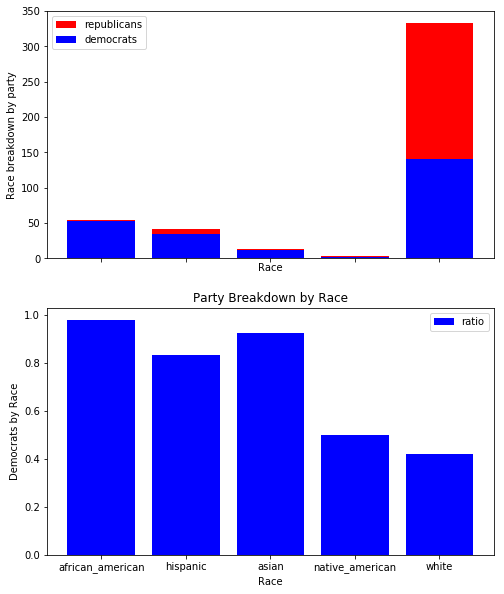

In [110]:
# Create a function that returns the dataframe number of members, and democrats vs republicans
races = ["african_american", "hispanic", "asian", "native_american", "white"]
dem, total, ratio = [], [], []
for race in races[:4]:
    dem.append(house_demographics[race][(house_demographics[race]==True) & 
                                        (house_demographics["party"]=='D')].count())
    total.append(house_demographics[race][house_demographics[race]==True].count())
    ratio.append(round(dem[-1]/total[-1], 3))
    
total.append(house_demographics["party"][house_demographics[races[:3]].sum(axis=1)==0].count())
dem.append(house_demographics["party"][(house_demographics[races[:3]].sum(axis=1)==0) &
                                       (house_demographics["party"]=="D")].count())
ratio.append(round(dem[-1]/total[-1], 3))
count_df = pd.DataFrame(list(zip(races, dem, total, ratio)), columns=["race", "democrats", "total", "ratio"])

fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
plt.title("Party Breakdown by Race")
ax[0].bar(races, np.subtract(total, dem), width=0.8, color="red", label='republicans', bottom=dem)
ax[0].bar(races, dem, width=0.8, color="blue", label='democrats')
ax[0].set_ylabel("Race breakdown by party")
ax[0].set_xlabel("Race")
ax[0].legend(loc="best")
ax[1].bar(races, ratio, width=0.8, label='ratio', color="blue")
ax[1].set_ylabel("Democrats by Race")
ax[1].set_xlabel("Race")
ax[1].legend(loc="best")


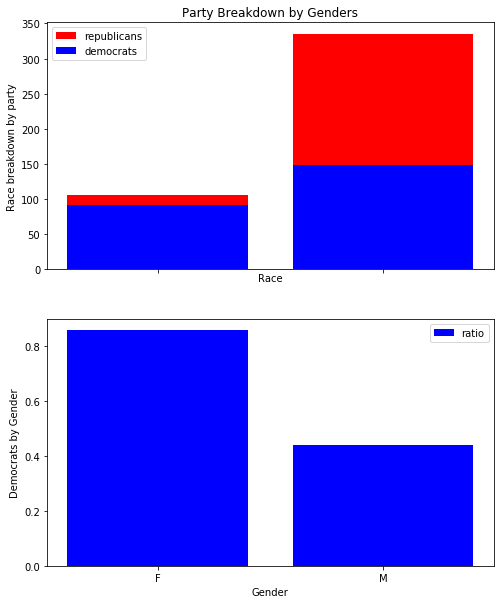

In [120]:
genders = ["F", "M"]
dem, total, ratio = [], [], []
for gender in genders:
    dem.append(house_demographics["gender"][(house_demographics["gender"]==gender) & 
                                        (house_demographics["party"]=='D')].count())
    total.append(house_demographics[race][house_demographics["gender"]==gender].count())
    ratio.append(round(dem[-1]/total[-1], 3))

count_df = pd.DataFrame(list(zip(["Female", "Male"], dem, total, ratio)), columns=["gender", "democrats", "total", "ratio"])

fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
ax[0].set_title("Party Breakdown by Genders")
ax[0].bar(genders, np.subtract(total, dem), width=0.8, color="red", label='republicans', bottom=dem)
ax[0].bar(genders, dem, width=0.8, color="blue", label='democrats')
ax[0].set_ylabel("Gender breakdown by party")
ax[0].set_xlabel("Gender")
ax[0].legend(loc="best")
ax[1].bar(genders, ratio, width=0.8, label='ratio', color="blue")
ax[1].set_ylabel("Democrats by Gender")
ax[1].set_xlabel("Gender")
ax[1].legend(loc="best")
